In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Dataset for Q1.csv')
# Checking for missing values in the dataset and they are handled 
data.dropna(inplace=True)

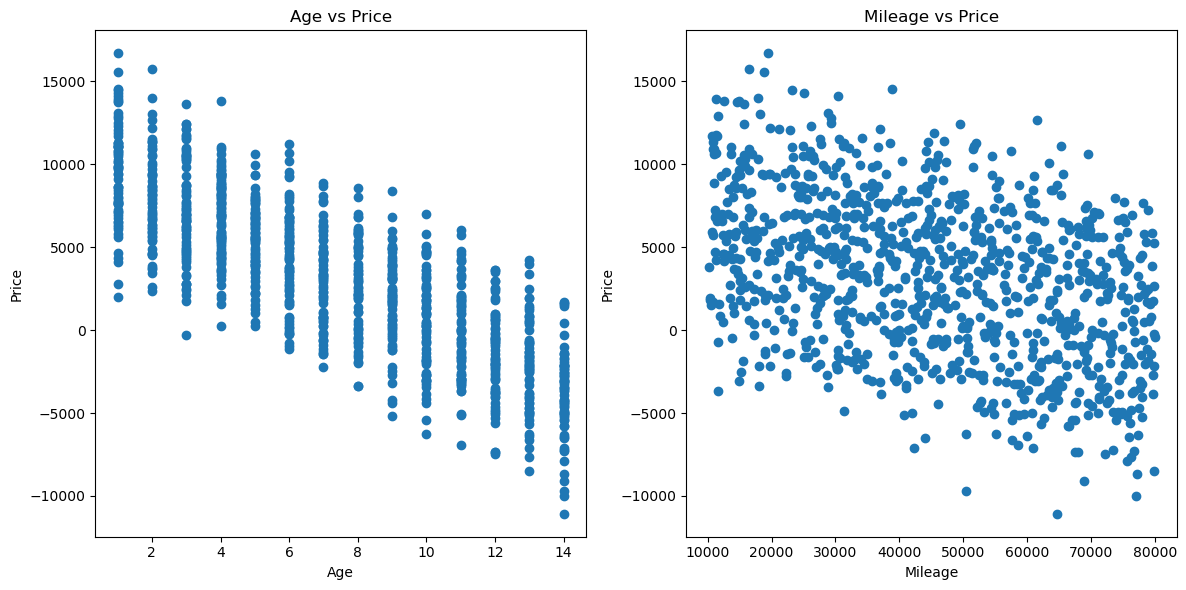

In [30]:
plt.figure(figsize=(12, 6))

#for Age vs Price
plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['Price'])
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')

#for Mileage vs Price
plt.subplot(1, 2, 2)
plt.scatter(data['Mileage'], data['Price'])
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [31]:
X = data[['Age', 'Mileage']]
y = data['Price']
#8:2 split between the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
scaler = StandardScaler() #Normalizing the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
svm_model = SVR(kernel='linear') #linear model created
param_grid = {'C': range(10,1000,10), 'epsilon': np.arange(0.01,1.0,0.01)}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_svm_model = grid_search.best_estimator_ #best parameters found
print("Tuned Parameters: ", grid_search.best_params_)

Tuned Parameters:  {'C': 150, 'epsilon': 0.01}


In [49]:
y_pred = best_svm_model.predict(X_test_scaled)
#Errors displayed
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1685.2815941117356
Mean Squared Error: 4442938.086764114
R-squared: 0.812780590757829


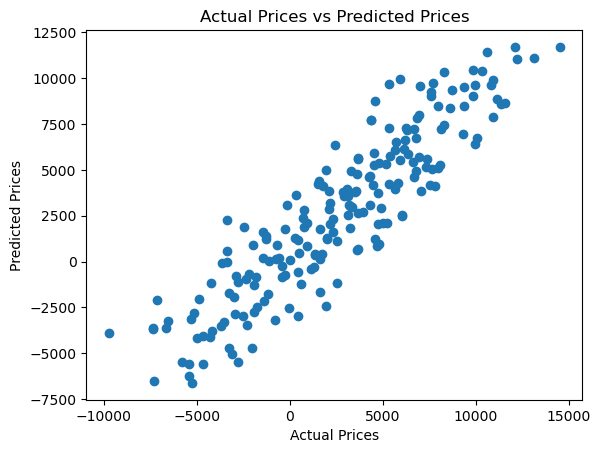

In [35]:
#Scatter plot predicted vs actual price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()
